# Machine learing

## Further preprocessing

### Reading the necessary libraries and import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings;
warnings.filterwarnings('ignore');

Reading the preprocessed machine learning data formed in R
And removing the unnamed:0 kolom that will be inserted.

In [2]:
Influ_data_P = pd.read_csv("/kaggle/input/combined-data-p/combined_data_P.csv", index_col=0)
#Drop the donor IDs. These can't be used to make the machine learning model.
Influ_data_P = Influ_data_P.drop("donor_id", axis = 1)
print(Influ_data_P)

     Th17_TFH_CD8_pos_T_cells  CD57_pos_CD4_pos_T_cells  \
1                    5.281071                      0.67   
2                    0.000000                      0.64   
3                    0.000000                      0.41   
4                    0.760000                      5.46   
5                    1.830000                      1.97   
..                        ...                       ...   
300                  0.000000                      0.59   
301                  0.000000                      0.60   
302                  2.170000                      1.69   
303                  0.000000                      0.38   
304                  1.230000                      0.38   

     CD16_pos_CD14_pos_monocytes  Th17_non_neg_TFH_CD8_pos_T_cells  \
1                           1.55                              0.94   
2                           1.33                              0.92   
3                           0.58                              1.23   
4          

### Dividing the data in a trainset and testset

In [3]:
from sklearn.model_selection import train_test_split

# Difining the features (X) and target (y)
X = Influ_data_P.drop('vaccine_response', axis=1)
y = Influ_data_P['vaccine_response']

# Dividing the data in train- en testdatasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#test_size=0,30 means that we use 30% as test data and 70% as traindata.
#Random_state=42 ensures that the distribution, between the train and testdata,is reproducible. By using a fixed number, we get always the same distribution if we run our code again from the beginning.
#Stratify=y is ensuring that both the training and test sets have a similar proportion of each class by stratified splitting. This helps maintain the class distribution in both sets.

# Control the split up of both datasets
print(f'Train set: {X_train.shape}, {y_train.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Train set: (212, 76), (212,)
Test set: (92, 76), (92,)


Control if vaccine_response is out the X dataframe.

In [4]:
print(X)

     Th17_TFH_CD8_pos_T_cells  CD57_pos_CD4_pos_T_cells  \
1                    5.281071                      0.67   
2                    0.000000                      0.64   
3                    0.000000                      0.41   
4                    0.760000                      5.46   
5                    1.830000                      1.97   
..                        ...                       ...   
300                  0.000000                      0.59   
301                  0.000000                      0.60   
302                  2.170000                      1.69   
303                  0.000000                      0.38   
304                  1.230000                      0.38   

     CD16_pos_CD14_pos_monocytes  Th17_non_neg_TFH_CD8_pos_T_cells  \
1                           1.55                              0.94   
2                           1.33                              0.92   
3                           0.58                              1.23   
4          

In [5]:
y_train.value_counts()

vaccine_response
0    150
1     62
Name: count, dtype: int64

In [6]:
y_test.value_counts()

vaccine_response
0    65
1    27
Name: count, dtype: int64

We can see that the amount of non-vaccine responders is double the  amount of vaccine responders. Thus we have a class imbalance.

### Standardization of the data

**Using StandardScaler()**

*A) The train set (X_train)*

First looking at the summary of alle the features. They are all expressed in the same units,% of Parent, see preprocessing in R. But the numbers are not on the same scale. Some are 0.-numbers and others are 80+-numbers.

In [7]:
print(X.describe())

       Th17_TFH_CD8_pos_T_cells  CD57_pos_CD4_pos_T_cells  \
count                304.000000                304.000000   
mean                   5.972037                  2.672137   
std                    4.051475                  2.097784   
min                    0.000000                  0.130000   
25%                    5.087500                  1.882500   
50%                    5.281071                  2.622768   
75%                    7.641224                  2.791400   
max                   25.400000                 19.900000   

       CD16_pos_CD14_pos_monocytes  Th17_non_neg_TFH_CD8_pos_T_cells  \
count                   304.000000                        304.000000   
mean                      2.419688                          2.863691   
std                       1.740978                          1.752840   
min                       0.000000                          0.000000   
25%                       1.782500                          2.245000   
50%               

> Visualize the data in boxplots.

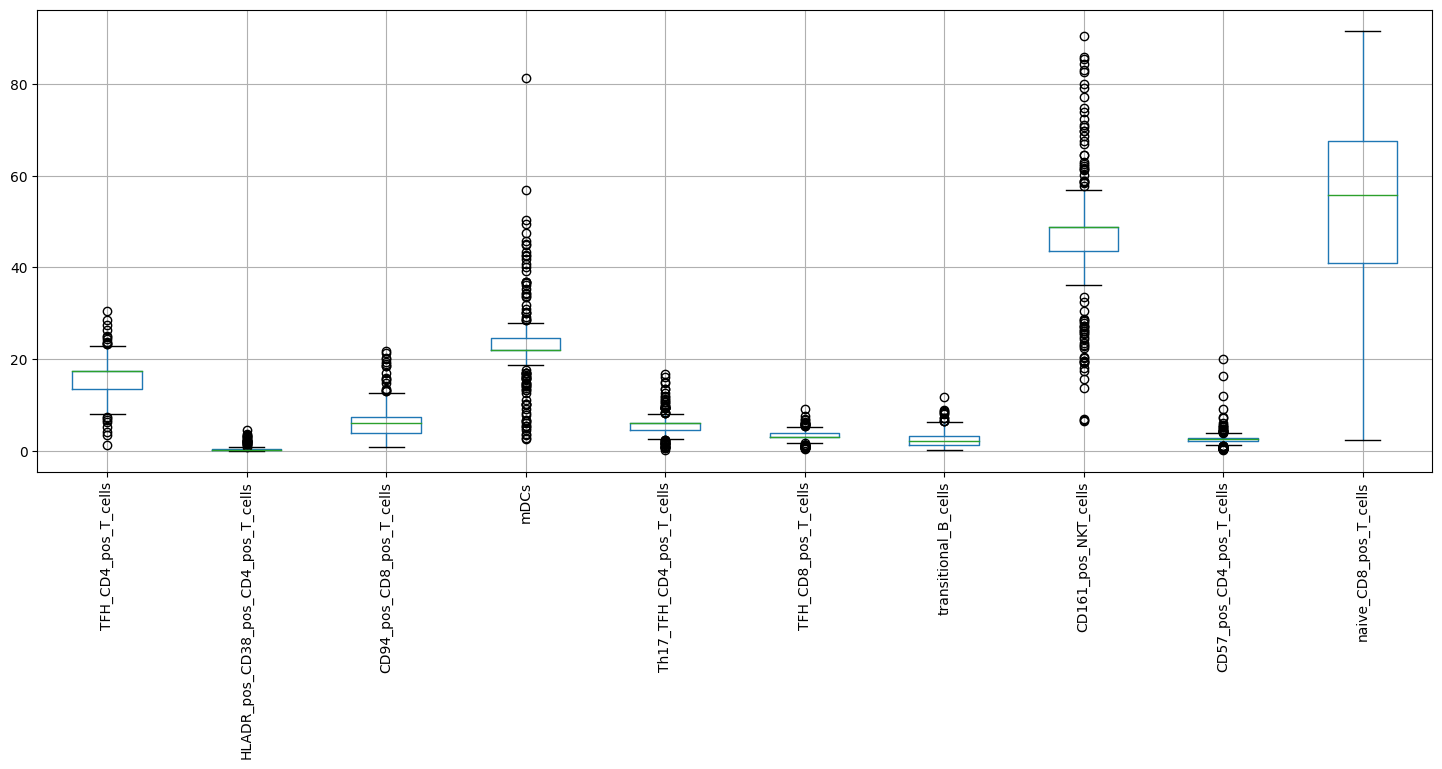

In [8]:
plt.figure(figsize=(18,6)) #set the size of the plot
X_train.sample(10, axis="columns").boxplot()
plt.xticks(rotation=90) #rotate the gene names on the x-axis
plt.show() #show the plot

We can see that the features have clearly different scales and there are some outliers. We will normalize the features using StandardScaler.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()

In [10]:
scaler_std.fit(X_train)
#fit computes the mean and the standard deviation for each attribute.

print("Means:")
print(scaler_std.mean_)
print("Variances:")
print(scaler_std.var_)

Means:
[ 6.25110247  2.72156912  2.4760463   2.84771529 26.69709529  0.47323426
  2.71825119  1.82005546 46.62390869 47.4745288  16.56025422 25.96407001
 14.00865576 23.18157363 10.57792776 15.93655601  3.2971279  38.67915392
 50.67155308 36.7109007  54.60787979  3.39332637  5.79262637 54.06242999
 42.85049151 53.5446503  11.44843125 13.6197266  95.59873876 63.69772893
 90.41965151  6.4770191   4.96995085 83.33477602 82.78461854  1.17618357
  9.37417243  6.13594517  2.2597886   8.38652845  9.81710857 68.6960129
 16.38850507 80.01945004 46.6561407   0.41889704  3.25989545 10.08151235
 29.47544174 74.36496228 55.91002548 31.03787624  3.52487606 15.48728272
 32.44230075  2.90585157 18.42093671 12.87293482 21.28406278  3.13327628
  0.43504168  1.42372952  2.28270463  2.30562331  9.88676883 11.91427186
  9.57175992 16.97165876 51.78111898 54.17194411 18.26635524  3.97613695
  1.39312025 67.8783688   2.54081653  4.40466922]
Variances:
[1.72893870e+01 4.17022862e+00 2.95147742e+00 2.80548992e

Now, Normalize the features in the train set
The scaler object has a function transform() that uses the means and variances computed by the fit() function to normalize the feature

In [11]:
X_train_std = scaler_std.transform(X_train)

X_train_std

array([[ 0.25225702,  0.0433036 ,  0.12453748, ...,  0.54913172,
         0.54580847, -0.63684764],
       [ 0.24985205, -0.42190065,  1.66122015, ...,  0.03444567,
         0.05159744, -0.14987397],
       [-0.23328985, -0.04838186, -0.25638798, ...,  0.38573932,
        -0.55706246, -0.02312739],
       ...,
       [ 2.51293162, -0.57860103, -1.43542827, ..., -4.18107817,
        -0.97324017,  0.32375796],
       [ 0.33432059,  0.03419539,  0.50731116, ..., -0.33318723,
        -0.80676908, -0.49675932],
       [-1.34705001, -1.19071188, -1.33647522, ..., -1.24001503,
         0.6030329 , -0.75025247]])

The column names are missing after the transform() function. So we add them back by making a new panda dataframe.

In [12]:
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)

X_train_std

,Th17_TFH_CD8_pos_T_cells,CD57_pos_CD4_pos_T_cells,CD16_pos_CD14_pos_monocytes,Th17_non_neg_TFH_CD8_pos_T_cells,Th2_TFH_CD8_pos_T_cells,basophils,CD16_pos_CD14_neg_monocytes,CD16_neg_CD56bright_NK_cells,CD161_pos_NKT_cells,CD57_pos_NK_cells,...,IgD_neg_CD27_neg_B_cells,monocytes,naive_CD4_pos_T_cells,naive_CD8_pos_T_cells,NK_cells,NKT_cells,plasmablasts,T_cells,transitional_B_cells,Tregs
0,0.252257,0.043304,0.124537,0.031216,3.725263,0.707613,-0.901679,0.138260,-1.121736,-0.573140,...,1.012998,0.127891,0.322139,0.490190,1.150254,-0.097618,-0.416896,0.549132,0.545808,-0.636848
1,0.249852,-0.421901,1.661220,0.240176,0.746501,-0.083556,-0.710604,-1.826122,0.427020,-0.729241,...,-0.219596,-0.600927,0.308769,0.049838,2.103383,0.328829,-0.702478,0.034446,0.051597,-0.149874
2,-0.233290,-0.048382,-0.256388,-0.011100,-0.353441,-0.070306,0.162114,-0.091088,0.158117,-0.040169,...,0.747734,0.034186,-0.459998,-1.104745,0.055921,0.550581,-0.083717,0.385739,-0.557062,-0.023127
3,-1.503373,-1.131949,-1.103645,-0.965823,-1.269192,-0.946648,0.308462,0.608605,1.028546,-0.163373,...,0.181837,2.158170,1.532110,1.725325,-0.676576,-1.114266,1.595778,-1.199167,-0.957634,-1.217214
4,-0.130134,-0.230922,0.473784,-0.303121,3.043847,-1.378195,-0.901679,2.088809,0.019089,-1.285353,...,0.906892,0.179949,-0.660545,-0.954380,2.041606,1.775335,-0.811271,0.246856,-0.785960,-0.183228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,-0.233290,-0.048382,-0.256388,-0.011100,-0.353441,-0.070306,0.162114,-0.091088,0.158117,-0.040169,...,1.348999,-0.278165,-1.088380,-1.094004,0.964923,0.267420,-0.165311,0.140651,0.368933,-0.957050
208,-0.481260,-0.186850,4.082660,0.383463,-0.298337,-0.982611,0.152771,-1.272775,-0.520210,1.251298,...,-0.622798,0.273655,-0.058902,0.141131,1.900402,-0.479714,-0.634482,-0.259661,-0.031638,-0.356671
209,2.512932,-0.578601,-1.435428,-1.556882,-1.732555,-1.629930,-0.961832,-1.839956,2.114058,0.939095,...,0.305627,3.542924,-1.048271,0.243163,-1.566163,-0.977803,-0.478092,-4.181078,-0.973240,0.323758
210,0.334321,0.034195,0.507311,0.059395,0.507837,0.015700,-0.340556,0.046128,-0.215699,0.016339,...,2.604583,0.856709,-0.794244,-0.959751,-0.305915,0.134369,-0.233307,-0.333187,-0.806769,-0.496759


> Visualization of the features after normalization

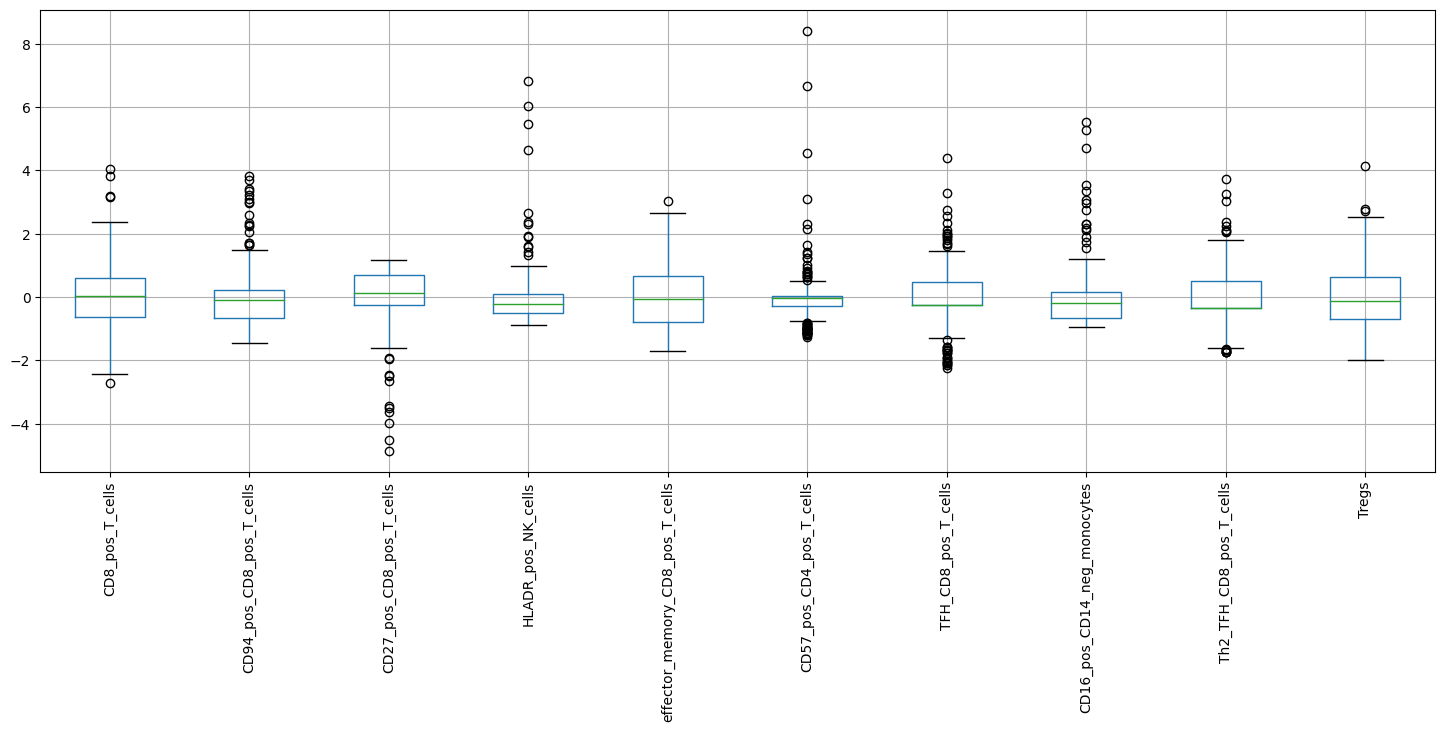

In [13]:
plt.figure(figsize=(18,6))
X_train_std.sample(10, axis="columns").boxplot()
plt.xticks(rotation=90)
plt.show()

We can see that the boxplots are now on the same scale. However there are still some outliers. We will keep them, because we can't know if these were measured wrong.

*B) The test set (X_test)*

Here we do exactly the same, only we do everything in one line of code for the test set (X_test).

In [14]:
X_test_std = pd.DataFrame(scaler_std.transform(X_test),columns=X_test.columns)

> Visualization after normalization

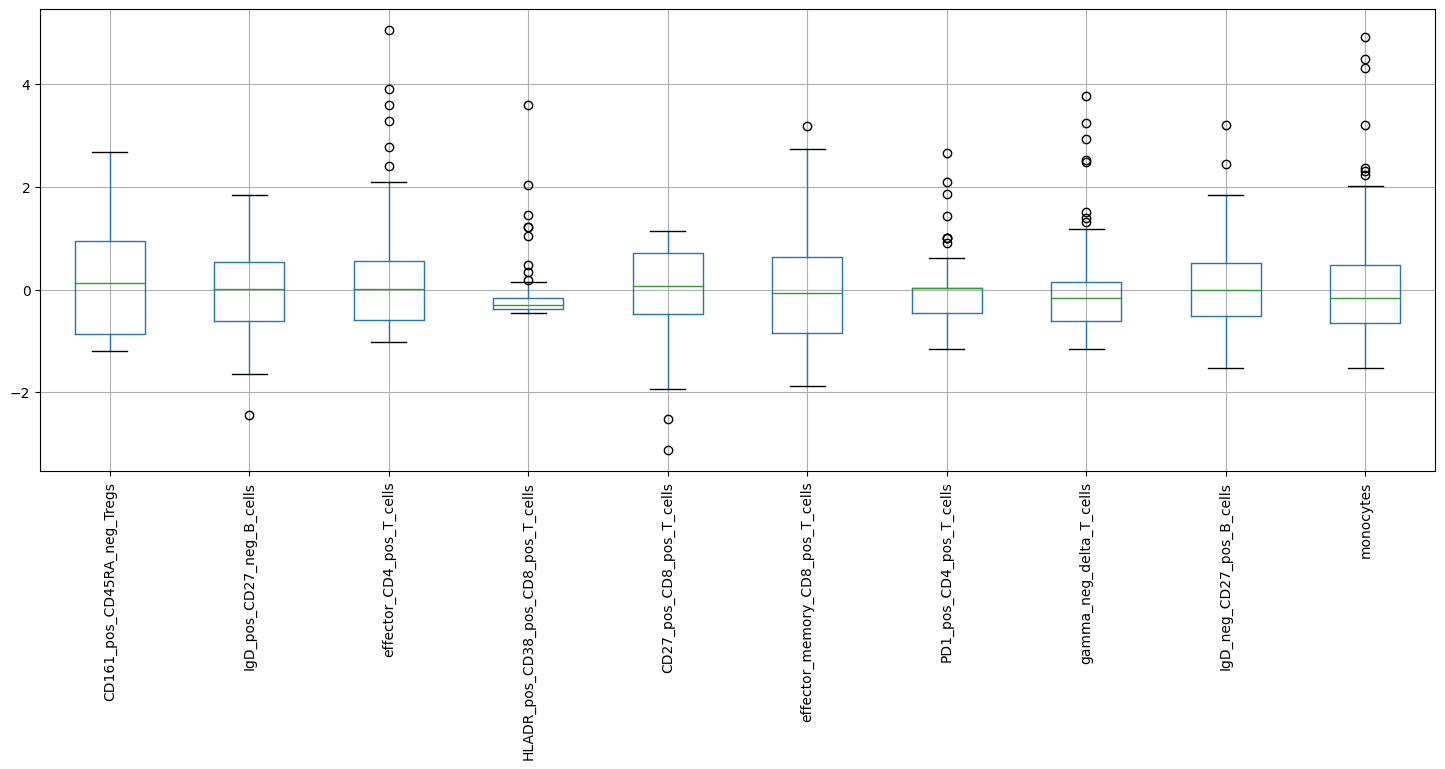

In [15]:
plt.figure(figsize=(18,6))
X_test_std.sample(10, axis="columns").boxplot()
plt.xticks(rotation=90)
plt.show()

**Standardization with MinMaxScaler()**

Using another type of standardization to see which one is best for our data.

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()

In [17]:
scaler_minmax.fit(X_train)
X_train_minmax = pd.DataFrame(scaler_minmax.transform(X_train), columns = X_train.columns)
X_train_minmax

,Th17_TFH_CD8_pos_T_cells,CD57_pos_CD4_pos_T_cells,CD16_pos_CD14_pos_monocytes,Th17_non_neg_TFH_CD8_pos_T_cells,Th2_TFH_CD8_pos_T_cells,basophils,CD16_pos_CD14_neg_monocytes,CD16_neg_CD56bright_NK_cells,CD161_pos_NKT_cells,CD57_pos_NK_cells,...,IgD_neg_CD27_neg_B_cells,monocytes,naive_CD4_pos_T_cells,naive_CD8_pos_T_cells,NK_cells,NKT_cells,plasmablasts,T_cells,transitional_B_cells,Tregs
0,0.287402,0.134684,0.178146,0.184073,1.000000,0.365169,0.009290,0.272890,0.283674,0.465056,...,0.379423,0.290412,0.593057,0.682682,0.640952,0.153288,0.080253,0.813202,0.305893,0.220284
1,0.287008,0.086582,0.352980,0.206919,0.454221,0.241573,0.038798,0.017953,0.550214,0.442048,...,0.189711,0.169263,0.590712,0.591061,0.862536,0.213733,0.035903,0.724719,0.223570,0.299891
2,0.207916,0.125203,0.134806,0.179447,0.252686,0.243643,0.173574,0.243126,0.503936,0.543612,...,0.338596,0.274836,0.455846,0.350838,0.386541,0.245164,0.131996,0.785112,0.122184,0.320611
3,0.000000,0.013165,0.038411,0.075065,0.084899,0.106742,0.196175,0.333932,0.653736,0.525453,...,0.251497,0.627899,0.805324,0.939665,0.216249,0.009188,0.392819,0.512640,0.055459,0.125409
4,0.224803,0.106329,0.217881,0.147520,0.875149,0.039326,0.009290,0.526032,0.480010,0.360081,...,0.363092,0.299065,0.420664,0.382123,0.848174,0.418762,0.019007,0.761236,0.084055,0.294438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,0.207916,0.125203,0.134806,0.179447,0.252686,0.243643,0.173574,0.243126,0.503936,0.543612,...,0.431138,0.222915,0.345608,0.353073,0.597866,0.205029,0.119324,0.742978,0.276430,0.167939
208,0.167323,0.110886,0.628477,0.222585,0.262782,0.101124,0.172131,0.089767,0.387197,0.733966,...,0.127654,0.314642,0.526211,0.610056,0.815347,0.099130,0.046463,0.674157,0.209705,0.266085
209,0.657480,0.070380,0.000662,0.010444,0.000000,0.000000,0.000000,0.016158,0.840552,0.687949,...,0.270550,0.858082,0.352645,0.631285,0.009438,0.028530,0.070750,0.000000,0.052860,0.377317
210,0.300836,0.133742,0.221695,0.187154,0.410492,0.257079,0.095945,0.260934,0.439603,0.551941,...,0.624388,0.411561,0.397209,0.381006,0.302421,0.186170,0.108765,0.661517,0.080589,0.243184


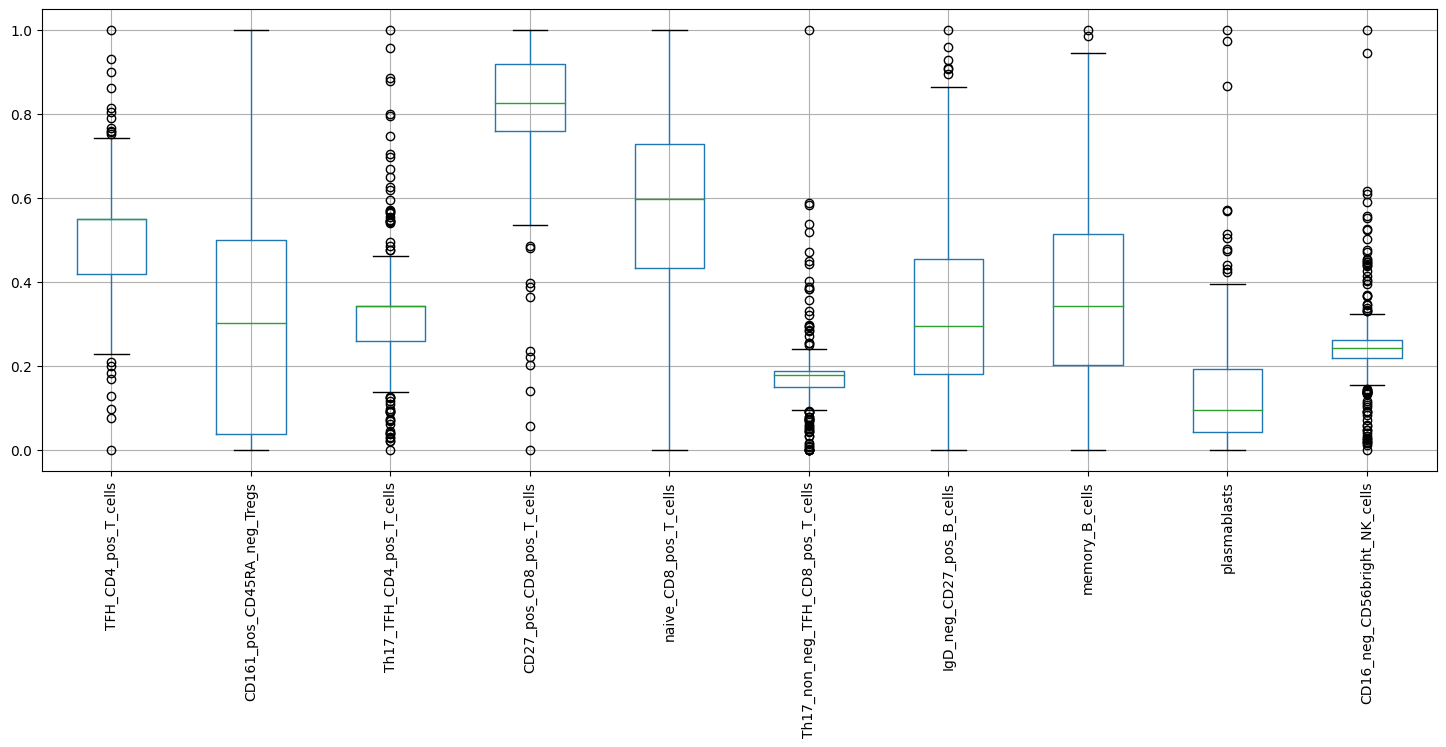

In [18]:
plt.figure(figsize=(18,6))
X_train_minmax.sample(10, axis="columns").boxplot()
plt.xticks(rotation=90)
plt.show()

After this we see that the minmax scaling is less good for our dataset. Hereby we use the data with the Standardscaler()

## Model Training 1: logistic regression

### Fit a logistic regression model

In [19]:
from sklearn.linear_model import LogisticRegression
cls_std = LogisticRegression()

Train the model on the normalized train data

In [20]:
cls_std.fit(X_train_std, y_train)

LogisticRegression()

The fitted modelparameters

In [21]:
cls_std.coef_[0]

array([ 0.29589104, -0.10370943,  1.32638498, -0.88672238,  0.10242585,
       -0.80594271,  0.04729574,  0.84605071, -0.4196056 ,  0.04029764,
       -0.94222907, -0.06841169,  0.62916042, -0.26067152, -0.05272974,
       -0.31213533,  0.53024749, -0.42317052, -1.31260183,  0.96941229,
       -0.44190984,  0.62373708,  0.0909815 , -0.62323887,  1.05501272,
       -0.08443397,  0.03962356, -0.42848535, -0.30866172,  0.6956886 ,
        0.20112857, -0.0421077 ,  0.04721379, -0.61749876, -0.14645157,
       -0.03181988, -0.05167183, -0.04124085,  0.21054216,  0.14056199,
       -0.0053387 , -0.05908592, -0.34151884,  0.07555837,  0.02199233,
       -0.20505027,  0.01594475,  0.32669785,  0.39516372,  0.52819895,
       -0.03443872,  0.03453484, -0.48395741,  0.1794635 ,  0.0211002 ,
        0.09735114,  0.45360696,  0.32726708, -0.21121366, -0.22232558,
       -0.62072501,  0.12186193,  0.35062996, -0.301559  , -0.06994709,
       -0.04085403,  0.17047502,  0.34276116, -0.20853047, -0.18

Predictions for the datapoints in the test set (X_test_std)

In [22]:
predictions_std = cls_std.predict(X_test_std)
predictions_std

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

0 represents no vaccine respons and 1 represents vaccine respons.
Here showing the predicted class label for each row in the X_test_std (normalized test set).

Now looking at the class probabilities in stead of classes. (Using the predict_proba() function.

In [23]:
predictions_std = cls_std.predict_proba(X_test_std)
predictions_std[:10]

array([[9.63436508e-01, 3.65634919e-02],
       [9.98958825e-01, 1.04117488e-03],
       [6.09137468e-03, 9.93908625e-01],
       [9.72274105e-01, 2.77258945e-02],
       [9.50899950e-01, 4.91000496e-02],
       [9.78720738e-01, 2.12792617e-02],
       [3.94587173e-01, 6.05412827e-01],
       [9.33180173e-01, 6.68198269e-02],
       [9.99840102e-01, 1.59897972e-04],
       [9.31121611e-01, 6.88783894e-02]])

These are the probabilities that the datapoint belongs to class 0, non-vaccine responder, (first number) and class 1, vaccine responder, (second number) respectively. 

What is the accuracy of the predictions?

In [24]:
print("Accuracy: {}".format(cls_std.score(X_test_std,y_test)))

Accuracy: 0.8043478260869565


The accuracy of 0.80 (or 80%). This is quite good, but still the dataset contains a class imbalance. This is because there are more non-responders then responders in the dataset, eventhough we used a stratified splitting this cannot be ruled out.

In [25]:
print("Accuracy: {}".format(cls_std.score(X_test,y_test)))

Accuracy: 0.7065217391304348


We can see that the normalization of the data had a good effect, because the accurary improved by 10%.

> Visualization of standardized logistic model (accuracy)

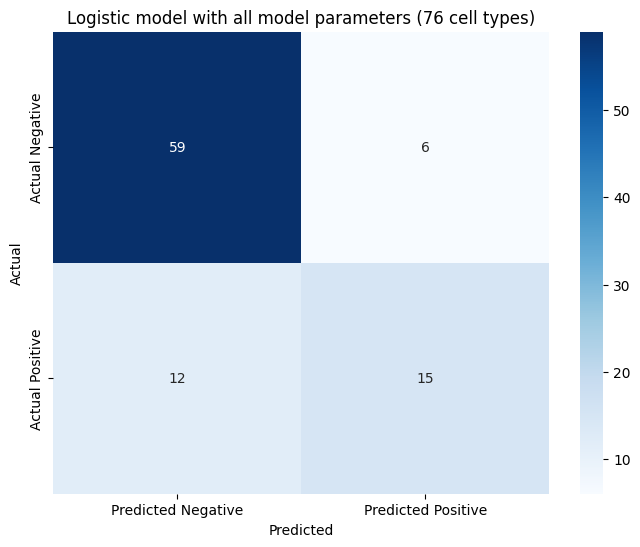

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on the test set
y_pred = cls_std.predict(X_test_std)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic model with all model parameters (76 cell types)')
plt.show()

We see that there are 12 false negatives and 6 false positives.

### Modelparameters and celtype importance

In [27]:
model_parameters = pd.DataFrame({"attribute": X_train.columns, 
                                 "parameter_value" : cls_std.coef_[0]})
model_parameters

,attribute,parameter_value
0,Th17_TFH_CD8_pos_T_cells,0.295891
1,CD57_pos_CD4_pos_T_cells,-0.103709
2,CD16_pos_CD14_pos_monocytes,1.326385
3,Th17_non_neg_TFH_CD8_pos_T_cells,-0.886722
4,Th2_TFH_CD8_pos_T_cells,0.102426
...,...,...
71,NKT_cells,-0.617123
72,plasmablasts,-0.002285
73,T_cells,0.113657
74,transitional_B_cells,0.243627


Sorting them from high to low (using sort_values())

In [28]:
model_parameters = model_parameters.sort_values(by="parameter_value", ascending=False)
model_parameters

,attribute,parameter_value
2,CD16_pos_CD14_pos_monocytes,1.326385
24,Th2_non_neg_TFH_CD8_pos_T_cells,1.055013
19,Th1_TFH_CD4_pos_T_cells,0.969412
7,CD16_neg_CD56bright_NK_cells,0.846051
75,Tregs,0.740676
...,...,...
23,Th2_non_neg_TFH_CD4_pos_T_cells,-0.623239
5,basophils,-0.805943
3,Th17_non_neg_TFH_CD8_pos_T_cells,-0.886722
10,CD57_pos_CD8_pos_T_cells,-0.942229


Visualization of these cell types and their influence on the logistic model using a horizontal barplot.

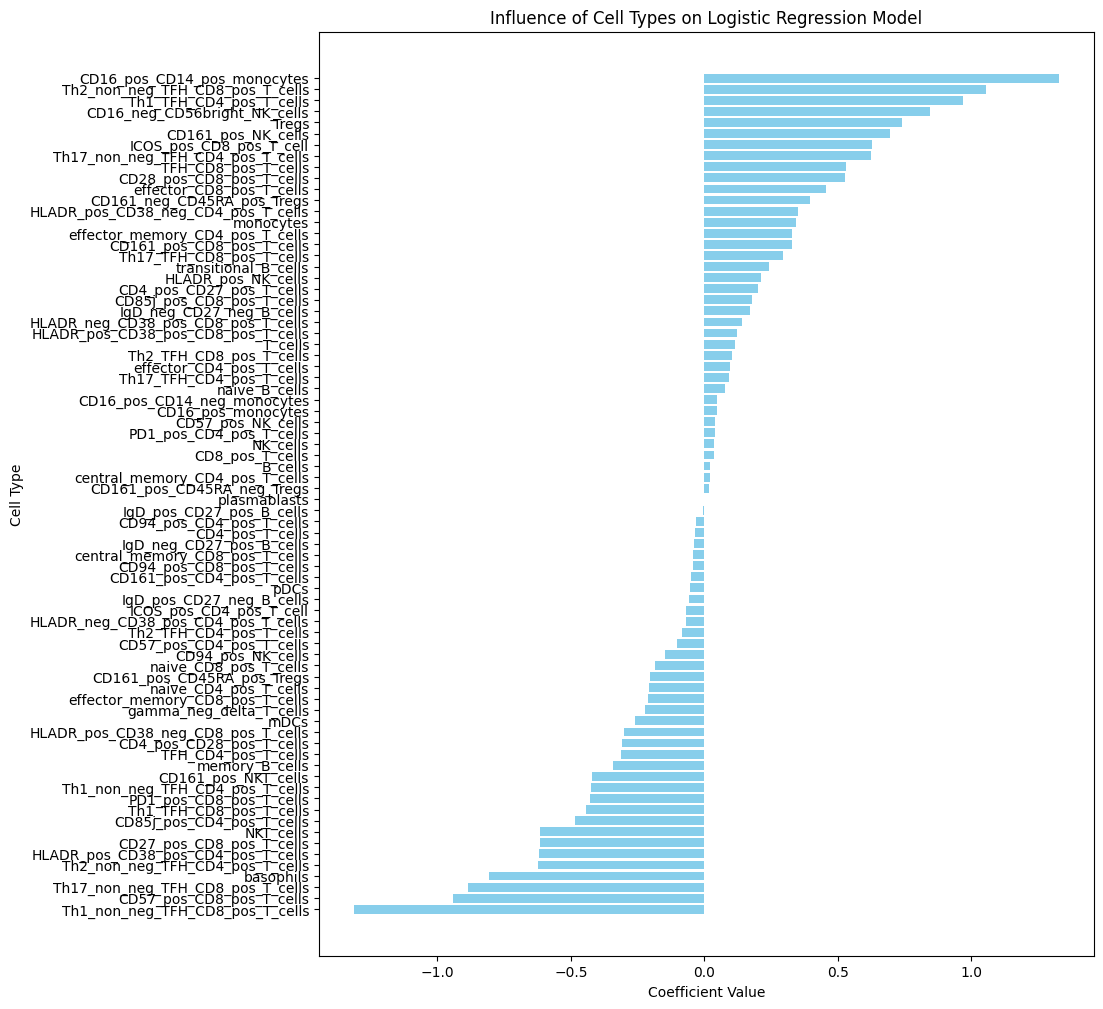

In [29]:
# Plot the horizontal bar plot
plt.figure(figsize=(10, 12))
plt.barh(model_parameters["attribute"], model_parameters["parameter_value"], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Cell Type')
plt.title('Influence of Cell Types on Logistic Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values on top
plt.show()

While the sign of the coefficient (positive or negative) indicates the direction of the relationship, the absolute value focuses solely on the magnitude. This is useful because we are more interested in the strength of the effect and helps in identifying which predictors have the most significant impact on the model.

We are here mainly interested in the absolute value of the modelparameter. This can be computed with the python abs() function. 

In [30]:
model_parameters["parameter_abs_value"] = model_parameters["parameter_value"].map(abs)
model_parameters

,attribute,parameter_value,parameter_abs_value
2,CD16_pos_CD14_pos_monocytes,1.326385,1.326385
24,Th2_non_neg_TFH_CD8_pos_T_cells,1.055013,1.055013
19,Th1_TFH_CD4_pos_T_cells,0.969412,0.969412
7,CD16_neg_CD56bright_NK_cells,0.846051,0.846051
75,Tregs,0.740676,0.740676
...,...,...,...
23,Th2_non_neg_TFH_CD4_pos_T_cells,-0.623239,0.623239
5,basophils,-0.805943,0.805943
3,Th17_non_neg_TFH_CD8_pos_T_cells,-0.886722,0.886722
10,CD57_pos_CD8_pos_T_cells,-0.942229,0.942229


Sort by model_parameters by parameter_abs_value from high to low

In [31]:
model_parameters = model_parameters.sort_values(by = "parameter_abs_value", ascending=False)
model_parameters

,attribute,parameter_value,parameter_abs_value
2,CD16_pos_CD14_pos_monocytes,1.326385,1.326385
18,Th1_non_neg_TFH_CD8_pos_T_cells,-1.312602,1.312602
24,Th2_non_neg_TFH_CD8_pos_T_cells,1.055013,1.055013
19,Th1_TFH_CD4_pos_T_cells,0.969412,0.969412
10,CD57_pos_CD8_pos_T_cells,-0.942229,0.942229
...,...,...,...
44,B_cells,0.021992,0.021992
54,central_memory_CD4_pos_T_cells,0.021100,0.021100
46,CD161_pos_CD45RA_neg_Tregs,0.015945,0.015945
40,IgD_pos_CD27_pos_B_cells,-0.005339,0.005339


We will select the top 20 most important cell types from model_parameters

In [32]:
selected_attributes = model_parameters.iloc[0:20, 0]
selected_attributes

2            CD16_pos_CD14_pos_monocytes
18       Th1_non_neg_TFH_CD8_pos_T_cells
24       Th2_non_neg_TFH_CD8_pos_T_cells
19               Th1_TFH_CD4_pos_T_cells
10              CD57_pos_CD8_pos_T_cells
3       Th17_non_neg_TFH_CD8_pos_T_cells
7           CD16_neg_CD56bright_NK_cells
5                              basophils
75                                 Tregs
29                    CD161_pos_NK_cells
12               ICOS_pos_CD8_pos_T_cell
21      Th17_non_neg_TFH_CD4_pos_T_cells
23       Th2_non_neg_TFH_CD4_pos_T_cells
60    HLADR_pos_CD38_pos_CD4_pos_T_cells
33              CD27_pos_CD8_pos_T_cells
71                             NKT_cells
16                   TFH_CD8_pos_T_cells
49              CD28_pos_CD8_pos_T_cells
52             CD85j_pos_CD4_pos_T_cells
56              effector_CD8_pos_T_cells
Name: attribute, dtype: object

Convert them into a list (here a dataframe). We can use this list then to make an another logistic regression model on the train set that contains only the standardized features for the cell types in selected_attributes.

In [33]:
selected_attributes = list(selected_attributes)
selected_attributes

['CD16_pos_CD14_pos_monocytes',
 'Th1_non_neg_TFH_CD8_pos_T_cells',
 'Th2_non_neg_TFH_CD8_pos_T_cells',
 'Th1_TFH_CD4_pos_T_cells',
 'CD57_pos_CD8_pos_T_cells',
 'Th17_non_neg_TFH_CD8_pos_T_cells',
 'CD16_neg_CD56bright_NK_cells',
 'basophils',
 'Tregs',
 'CD161_pos_NK_cells',
 'ICOS_pos_CD8_pos_T_cell',
 'Th17_non_neg_TFH_CD4_pos_T_cells',
 'Th2_non_neg_TFH_CD4_pos_T_cells',
 'HLADR_pos_CD38_pos_CD4_pos_T_cells',
 'CD27_pos_CD8_pos_T_cells',
 'NKT_cells',
 'TFH_CD8_pos_T_cells',
 'CD28_pos_CD8_pos_T_cells',
 'CD85j_pos_CD4_pos_T_cells',
 'effector_CD8_pos_T_cells']

Now making the logistic regression model

In [34]:
cls_std.fit(X_train_std[selected_attributes],y_train)

LogisticRegression()

The prediction accuracy

In [35]:
print("Accuracy: {}".format(cls_std.score(X_test_std[selected_attributes],y_test)))
X_test_std
y_test

Accuracy: 0.7934782608695652


247    0
298    0
258    1
293    0
64     0
      ..
65     0
116    1
24     0
91     1
8      0
Name: vaccine_response, Length: 92, dtype: int64

The accuracy is 79%. This is very close the the initial accuracy of 80%. This shows that these 20 cell types are mostly sufficient to predict the vaccine response.

Visualisation

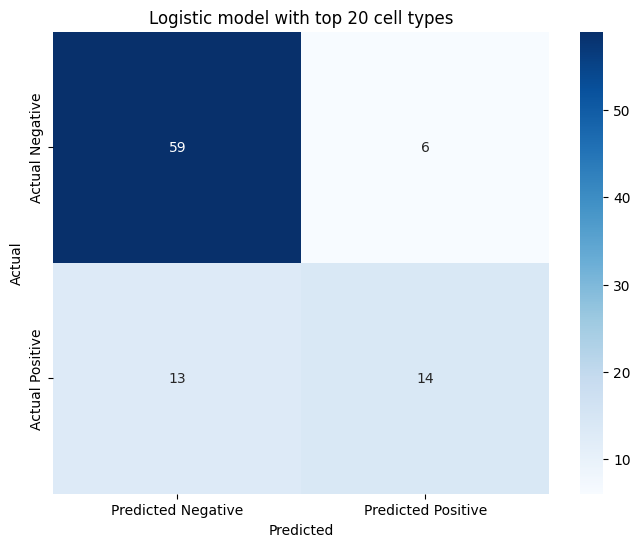

In [36]:
# Predict on the test set
y_pred = cls_std.predict(X_test_std[selected_attributes])

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic model with top 20 cell types')
plt.show()

For-loop that prints the prediction accuracy for the top-x most important cell types.

In [37]:
for s in range(1,50):
    attribute = model_parameters.head(s)["attribute"]
    cls_std.fit(X_train_std[attribute], y_train)
    print("Accuracy: {}".format(cls_std.score(X_test_std[attribute],y_test)))

Accuracy: 0.717391304347826
Accuracy: 0.717391304347826
Accuracy: 0.717391304347826
Accuracy: 0.8260869565217391
Accuracy: 0.8369565217391305
Accuracy: 0.8478260869565217
Accuracy: 0.8260869565217391
Accuracy: 0.8369565217391305
Accuracy: 0.8043478260869565
Accuracy: 0.8043478260869565
Accuracy: 0.8043478260869565
Accuracy: 0.8152173913043478
Accuracy: 0.8152173913043478
Accuracy: 0.8152173913043478
Accuracy: 0.8369565217391305
Accuracy: 0.8152173913043478
Accuracy: 0.8260869565217391
Accuracy: 0.8152173913043478
Accuracy: 0.8152173913043478
Accuracy: 0.7934782608695652
Accuracy: 0.8043478260869565
Accuracy: 0.8043478260869565
Accuracy: 0.8152173913043478
Accuracy: 0.8152173913043478
Accuracy: 0.8152173913043478
Accuracy: 0.782608695652174
Accuracy: 0.782608695652174
Accuracy: 0.8043478260869565
Accuracy: 0.8043478260869565
Accuracy: 0.8043478260869565
Accuracy: 0.7934782608695652
Accuracy: 0.7934782608695652
Accuracy: 0.8043478260869565
Accuracy: 0.8043478260869565
Accuracy: 0.8152173

We can see that after the use of the top six cell types that the accuracy is already 0,847 (84,7%).

So the model can make a 85% correct prediction based in these six cell types. When we include more cell types we see that the accuracy fluctuates around the 0.80 (80%). This could be due to overfitting.

What are these six cell types?

In [38]:
TOP_6_cells = selected_attributes[0:6]
print(TOP_6_cells)

['CD16_pos_CD14_pos_monocytes', 'Th1_non_neg_TFH_CD8_pos_T_cells', 'Th2_non_neg_TFH_CD8_pos_T_cells', 'Th1_TFH_CD4_pos_T_cells', 'CD57_pos_CD8_pos_T_cells', 'Th17_non_neg_TFH_CD8_pos_T_cells']


Making the model again with the top four cell types.

In [39]:
cls_std.fit(X_train_std[TOP_6_cells],y_train)

LogisticRegression()

In [40]:
print("Accuracy: {}".format(cls_std.score(X_test_std[TOP_6_cells],y_test)))

Accuracy: 0.8478260869565217


> Visualisation of top four cell types (accuracy)

Logistic model with the top four cell types

Creating a heatmap based on the scoring matrix (confusion matrix), making it easier to see the distribution of true positives, false positives, true negatives, and false negatives.

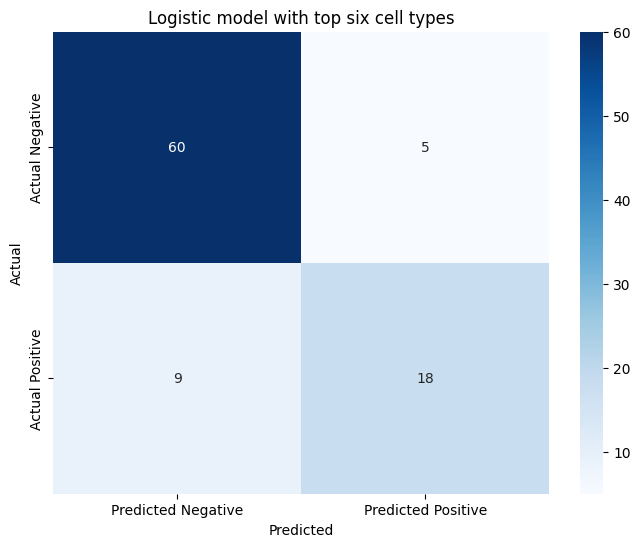

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on the test set
y_pred = cls_std.predict(X_test_std[TOP_6_cells])

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic model with top six cell types')
plt.show()

When the model uses only the six most important cell types, the model can predict with a 85% accuracy the vaccine respons. If we compare this to the model that uses all the cell types this is an increase of about 5%. In the visualizations we see that there are less false negatives and false positives

Importantly, keep in mind that there is a class imbalance in the dataset and the there are some missing values that were imputated by the mean (see Preprosessing in R). This could lead to a mispresentation of the real world situation.

### Dimensionality reduction with t-SNE

Reducing the train set from 76 columns (=cell types) to just two columns with t-SNE algorithm

Initialize a t-SNE model. Because our dataset is quite small for machine learning, we will initialize the t-SNE model with different perplexities. Then we can see which perplexity caputures the data's structure best.

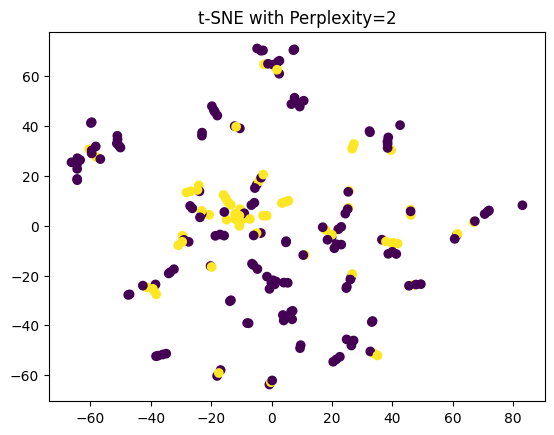

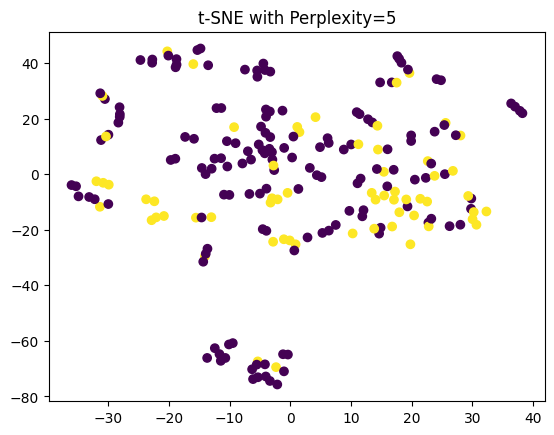

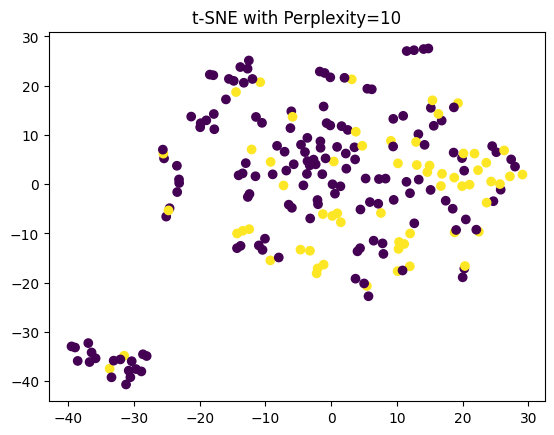

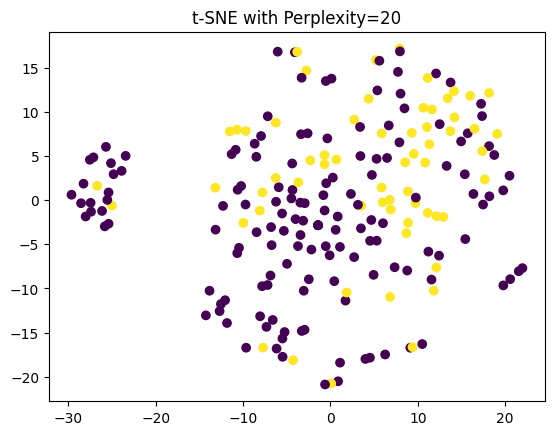

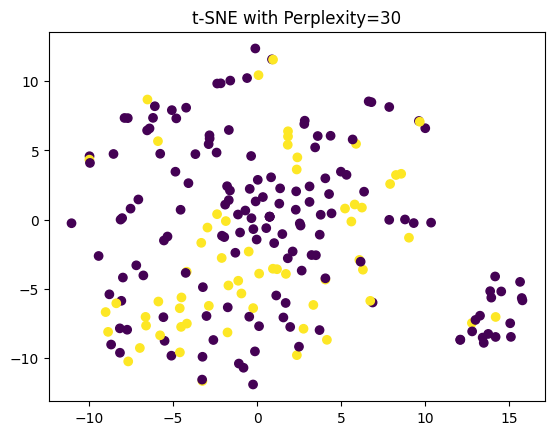

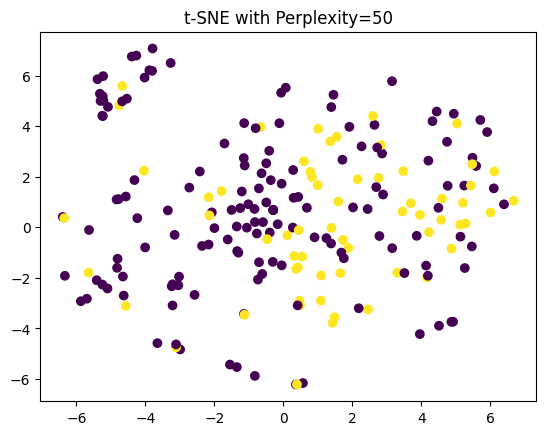

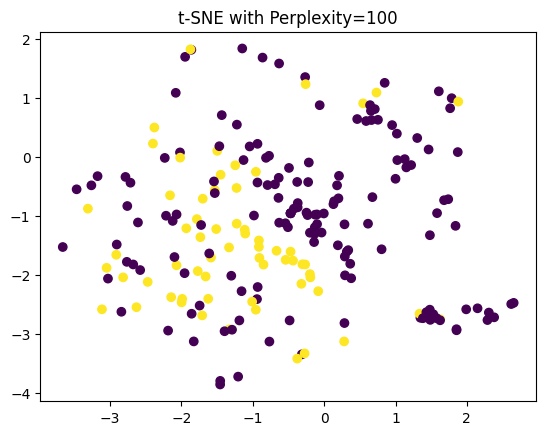

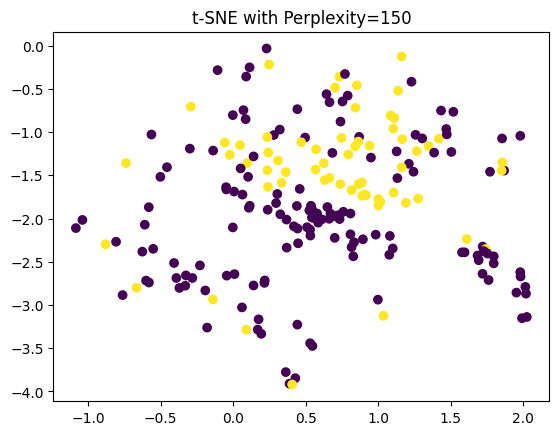

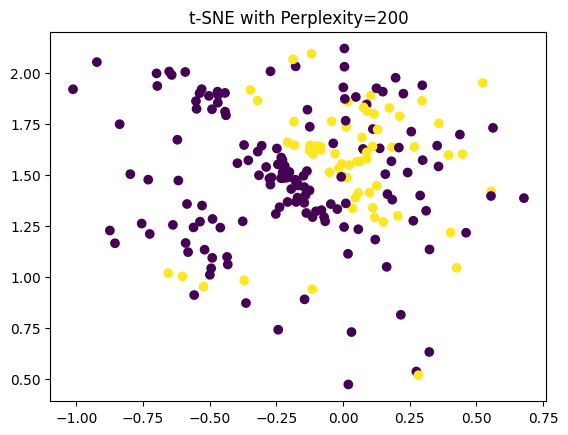

In [42]:
from sklearn.manifold import TSNE
perplexities = [2,5,10,20,30,50,100,150,200]

for perplexity in perplexities:
    tsne = TSNE(perplexity=perplexity, random_state=42, n_components=2)
    X_embedded = tsne.fit_transform(X_train_std)
#Random_state=42 By using a fixed number, we get always the same distribution if we run our code again from the beginning.
    
# Plot the results
    plt.figure()
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_train)
    plt.title(f't-SNE with Perplexity={perplexity}')
    plt.show()

All the perplexities are not that great. One reason can be due to the outliers that are still present after the standardization. We are going with perplexity 200. Here the seperation of the clusters is the clearest.

In [43]:
model_tSNE = TSNE(n_components=2, perplexity=200, random_state=42)
X_embedded = model_tSNE.fit_transform(X_train_std)

Make X_embedded into a Pandas DataFrame with columns t-SNE_1, t-SNE_2 and the vaccine_response label

In [44]:
# Convert to DataFrame and reset index
tsne_result = pd.DataFrame(X_embedded, columns=["t-SNE_1", "t-SNE_2"])
tsne_result.reset_index(drop=True, inplace=True)

# Ensure y_train has the same index
y_train_reset = y_train.reset_index(drop=True)
#I had the problem of NaN values in the vaccine_response column. By resetting the indexes this issue is resolved.

# Add the target column to the t-SNE result
tsne_result["vaccine_response"] = y_train_reset

# Check the result
tsne_result

,t-SNE_1,t-SNE_2,vaccine_response
0,0.524101,1.951789,1
1,0.181611,1.567654,0
2,-0.101237,1.322188,0
3,-0.271751,2.008813,0
4,0.448489,1.602595,1
...,...,...,...
207,0.324463,1.134999,0
208,-0.006620,1.491179,0
209,-0.498873,1.010589,0
210,0.112484,1.338896,1


> Visualization of t-SNE dimensions

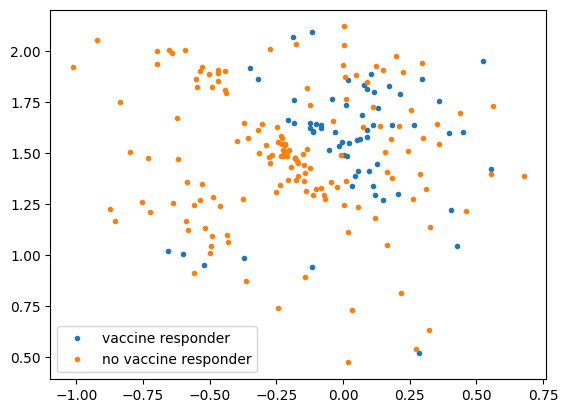

In [45]:
fig, ax = plt.subplots()
tmp = tsne_result[tsne_result["vaccine_response"]==1]
ax.plot(tmp["t-SNE_1"], tmp["t-SNE_2"], marker='o', linestyle='', ms=3, label="vaccine responder")
tmp = tsne_result[tsne_result["vaccine_response"]==0]
ax.plot(tmp["t-SNE_1"], tmp["t-SNE_2"], marker='o', linestyle='', ms=3, label="no vaccine responder")
ax.legend()
plt.show()

The dimension reduction with SNE does not show a clear distinction for both classes. 

## Model training 2: DecisionTreeClassifier model

### Fit a DecisionTreeClassifier model

Here we choose for a DecisionTreeClassifier instead of a DecisionTreeRegressor model, because the DecisionTreeClassifier is a better choice for predicting a categorical binary variable (vaccine_response).

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
iowa_model = DecisionTreeClassifier(random_state = 42)

#fit the model
iowa_model.fit(X_train_std, y_train)
iowa_model

DecisionTreeClassifier(random_state=42)

Predictions for the datapoints in the test set (X_test_std)

In [48]:
predictions = iowa_model.predict(X_test_std)
print(predictions)

[1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0]


Are these correct?

In [49]:
predictions = iowa_model.predict(X_test_std.head())
print(predictions)
y_test.head()

[1 0 1 0 0]


247    0
298    0
258    1
293    0
64     0
Name: vaccine_response, dtype: int64

We can see that for the first few results, the prediction was in 4/5 cases correct.

### Method Validation

In [50]:
from sklearn.metrics import mean_absolute_error

predictions = iowa_model.predict(X_test_std)
mean_absolute_error(y_test, predictions)

0.15217391304347827

With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. This is our measure of model quality. So on average, our predictions are off by about 0.15. This is quite low and can again be due to the class imbalance in the dataset.

In [51]:
def get_mae(max_leaf_nodes, X_train_std, X_test_std, y_train, y_test):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=42)
    model.fit(X_train_std, y_train)
    preds_val = model.predict(X_test_std)
    mae = mean_absolute_error(y_test, preds_val)
    return mae

In [52]:
for max_leaf_nodes in [2, 3, 4, 5, 10, 100]:
    my_mae = get_mae(max_leaf_nodes, X_train_std, X_test_std, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %f" % (max_leaf_nodes, my_mae))

Max leaf nodes: 2  		 Mean Absolute Error:  0.184783
Max leaf nodes: 3  		 Mean Absolute Error:  0.173913
Max leaf nodes: 4  		 Mean Absolute Error:  0.163043
Max leaf nodes: 5  		 Mean Absolute Error:  0.163043
Max leaf nodes: 10  		 Mean Absolute Error:  0.173913
Max leaf nodes: 100  		 Mean Absolute Error:  0.173913


We can see that after 4 leaves the mean absolute error is the lowest. So 4 is the optimal number of leaves to prevent overfitting.

In [53]:
from sklearn.model_selection import cross_val_score
# Control the predictions with 4 leaves
iowa_model = DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)
iowa_model.fit(X_train_std, y_train)
preds_val = iowa_model.predict(X_test_std)
print("Predictions:", preds_val)
print("Actual values:", y_test.values)

# Cross-validation
scores = cross_val_score(iowa_model, X_train_std, y_train, cv=5, scoring='neg_mean_absolute_error')
print("Cross-validation scores:", -scores)
print("Mean cross-validation score:", -scores.mean())

Predictions: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0]
Actual values: [0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0]
Cross-validation scores: [0.1627907  0.06976744 0.14285714 0.16666667 0.14285714]
Mean cross-validation score: 0.1369878183831672


Determining the accuracy of the model (4 leaves)

In [54]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8478260869565217


This is exactly the same accuracy as the logistic regression model with the top 4 cell types.

Creating a heatmap based on the scoring matrix (confusion matrix), making it easier to see the distribution of true positives, false positives, true negatives, and false negatives.

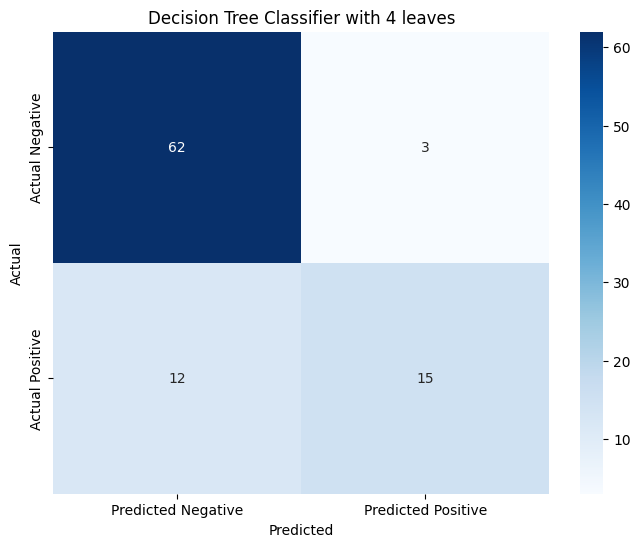

In [55]:
# Generate the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds_val)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Classifier with 4 leaves')
plt.show()

We can see that there are a few misclassified predictions. 12 false negatives and 3 false positives.

> Visualization of the dicision tree

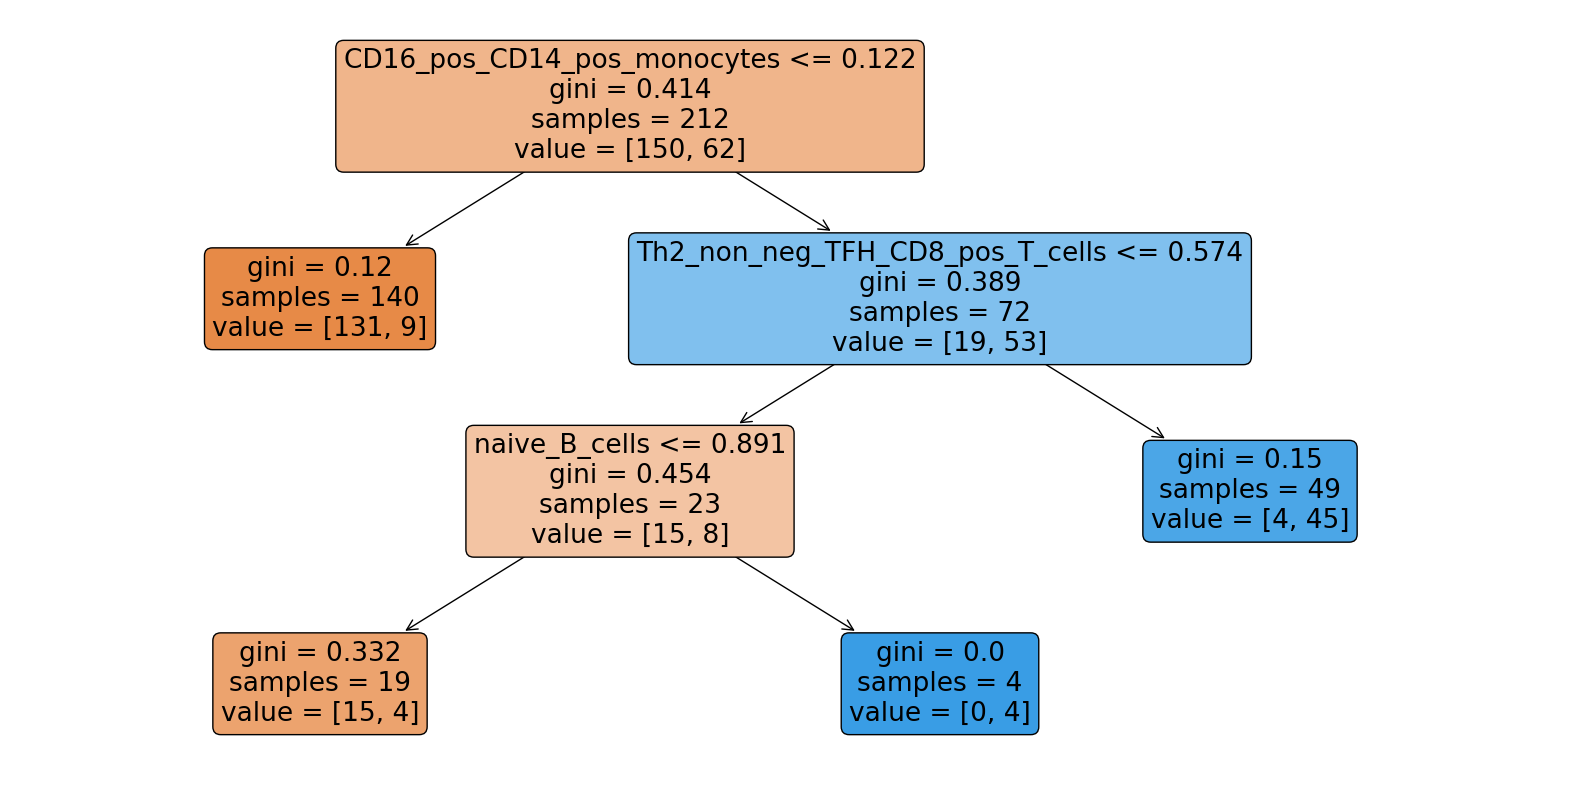

In [56]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(iowa_model, filled=True, feature_names=X.columns, rounded=True)
plt.show()

The Gini index, also known as Gini impurity, is a measure used in decision trees to determine the quality of a split. It helps the algorithm decide which feature and threshold to use for splitting the data at each node. 

Gini impurity measures the likelihood of incorrectly classifying a randomly chosen element if it was randomly labeled according to the distribution of labels in the dataset. This is a value between 0 (perfect purity, where all elements belong to a single class) and 1 (maximum impurity, where elements are randomly distributed across various classes.

Based on these 2 models, using 76 cell types, we could make a quite accurate prediction if someone is a vaccine responder or not. Still there is some bias in these models. Firstly due to the class imbalance in the dataset and secondly due to the amount of missing values that were imputated.